## Machine Learning Modeling for Rossmann Store Sales Prediction

This notebook covers:
- preprocessing 
- Building models with sklearn pipelines
- Choosing a loss function
- Post Prediction Analysis
- Serializing models

### Preprocessing 
It is important to process the data into a format where it can be fed to a machine learning
model. This typically means converting all non-numeric columns to numeric, handling NaN
values, and generating new features from already existing features.

In [1]:
# Add the parent directory to the system path 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
# importing modules from scripts 
from scripts.ml_modelling import *
from scripts.preprocessing import *

In [3]:
# loading data 
df_train = pd.read_csv('../data/clean/train.csv',low_memory=False, index_col=False)
df_test=pd.read_csv('../data/clean/test.csv', low_memory=False, index_col=False)
df_store=pd.read_csv('../data/store.csv',low_memory=False,index_col=False)

In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [6]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [8]:
df_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [9]:
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
# change date type from object to datetime type
df_train.Date = pd.to_datetime(df_train["Date"])
df_test.Date=pd.to_datetime(df_test["Date"])

In [11]:
df_test = pd.merge(df_test, df_store, how= 'inner', on='Store')

In [12]:
df_test.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

for columns [CompetitionOpenSinceYear, CompetitionOpenSinceMonth] the missing values indicate that no competition was present near the store.

Handling: Impute the missing values with 0 to signify that competition was not open during those periods for certain stores.

In [13]:
df_test['Promo2SinceWeek'] = df_test['Promo2SinceWeek'].fillna(0)
df_test['Promo2SinceYear'] = df_test['Promo2SinceYear'].fillna(0)
df_test['PromoInterval'] = df_test['PromoInterval'].fillna(0)

for columns [CompetitionOpenSinceYear, CompetitionOpenSinceMonth] the missing values indicate that no competition was present near the store.

Handling: Impute the missing values with 0 to signify that competition was not open during those periods for certain stores.

In [14]:
df_test['CompetitionOpenSinceYear'] = df_test['CompetitionOpenSinceYear'].fillna(0)
df_test['CompetitionOpenSinceMonth'] = df_test['CompetitionOpenSinceMonth'].fillna(0)

The column ['CompetitionDistance'] represents the distance to the nearest competitor. missing values mean no competitor is nearby

Handling: Fill with the median competition distance since missing values might represent unknown distances rather than a lack of competitors. I use median as it is robust to outliers.

In [15]:
median_distance = df_test['CompetitionDistance'].median()
df_test['CompetitionDistance'] = df_test['CompetitionDistance'].fillna(median_distance)

In [16]:
df_test.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### extract features from Date Column

In [17]:
extract_date_features(df_train)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,a,1,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0,1,1,Winter
1017205,1112,1,2013-01-01,0,0,0,0,a,1,c,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017206,1113,1,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017207,1114,1,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,2013,1,1,0,1,1,Winter


In [18]:
extract_date_features(df_test)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
1,2,3,3,2015-09-17,1.0,1,0,0,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,0,17,38,Summer
2,3,7,3,2015-09-17,1.0,1,0,0,a,c,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
3,4,8,3,2015-09-17,1.0,1,0,0,a,a,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
4,5,9,3,2015-09-17,1.0,1,0,0,a,c,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,5,2015-08-01,1.0,0,0,0,a,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,1,1,31,Summer
41084,41085,1112,5,2015-08-01,1.0,0,0,0,c,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer
41085,41086,1113,5,2015-08-01,1.0,0,0,0,a,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer
41086,41087,1114,5,2015-08-01,1.0,0,0,0,a,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer


-  features are extracted from a date column in our dataset. 
- The `extract_date_features` function enriches the DataFrame by adding new columns that capture essential date components, such as the year, month, day, and day of the week.
- Additionally, the function categorizes months into seasons, providing a clearer understanding of seasonal trends. 
- These enhancements facilitate more insightful analyses and modeling efforts, enabling us to uncover patterns related to time in our data.

In [19]:
# save the preprocessed data's
df_train.to_csv('../data/clean/preprocessed/train.csv', index=False)
df_test.to_csv('../data/clean/preprocessed/test.csv', index=False)

#### preprocessing for numeric and categorical features 

- The preprocessing pipeline prepare data for modeling by transforming both numeric and categorical features.
- Numeric features are standardized using StandardScaler,  while categorical features undergo one-hot encoding via OneHotEncoder

In [20]:
# Create and fit the preprocessing pipeline
preprocessor = create_preprocessing_pipeline()
X_train = df_train.drop(['Sales', 'Customers', 'Date'], axis=1)

In [21]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,4,1,1,0,1,c,a,1270.0,9.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
1,2,4,1,1,0,1,a,a,570.0,11.0,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
2,3,4,1,1,0,1,a,a,14130.0,12.0,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
3,4,4,1,1,0,1,c,c,620.0,9.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
4,5,4,1,1,0,1,a,a,29910.0,4.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,0,0,a,1,a,a,1900.0,6.0,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0,1,1,Winter
1017205,1112,1,0,0,a,1,c,c,1880.0,4.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017206,1113,1,0,0,a,1,a,c,9260.0,0.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017207,1114,1,0,0,a,1,a,c,870.0,0.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter


In [22]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'IsWeekend', 'DayOfMonth', 'WeekOfYear', 'Season'],
      dtype='object')

In [23]:
X_test = df_test.drop(['Id', 'Date'], axis=1)

In [24]:
preprocessor.fit(df_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Store', 'DayOfWeek', 'DayOfMonth',
                                  'WeekOfYear', 'Year', 'Month',
                                  'CompetitionDistance',
                                  'CompetitionOpenSinceMonth',
                                  'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                                  'Promo2SinceYear']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['StoreType', 'Assortment', 'StateHoliday',
                                  'SchoolHoliday', 'Season', 'Promo',
                                  'Promo2'])])

In [25]:
X_train_processed = preprocessor.transform(df_train)

In [26]:
X_test_processed = preprocessor.transform(df_test)

In [27]:
print(X_train_processed)
print(X_test_processed)

[[-1.73164032  0.50148416  1.74076566 ...  1.          1.
   0.        ]
 [-1.72853385  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 [-1.72542738  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 ...
 [ 1.72275751 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72586398 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72897045 -1.00047591 -1.67312281 ...  0.          0.
   1.        ]]
[[-1.73164032e+00  8.30805534e-04  1.47617711e-01 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-1.72542738e+00  8.30805534e-04  1.47617711e-01 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.71300149e+00  8.30805534e-04  1.47617711e-01 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 1.72275751e+00  1.00213752e+00 -1.67312281e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 1.72586398e+00  1.00213752e+00 -1.67312281e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 1.72897045e+00  1.00213

In [28]:
y_train = df_train['Sales']

## Building models with sklearn pipelines

In [29]:
# Assign the preprocessed data
X_train, X_test, y_train = X_train_processed,X_test_processed,y_train

In [30]:
# Split the training data further for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
# Build the model
model = build_model()

In [32]:
# Train the model with training data
trained_model = train_model(model, X_train, y_train)

### Model Evaluation

for this regression problem, I evaluated the performance of the model using the following metrics:

1. **Mean Squared Error (MSE)**
2. **Mean Absolute Error (MAE)**
3. **Root Mean Squared Error (RMSE)**
4. **R-squared (R2)**
5. **Mean Squared Logarithmic Error (MSLE)**

In [33]:
# Evaluate the model
mse, mae, rmse, r2, msle = evaluate_model(trained_model, X_val, y_val)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MSLE: {msle}")

MSE: 823698.0139255588
MAE: 510.6021401312579
RMSE: 907.5781034850713
R2: 0.9443025649721308
MSLE: 0.27115472078233194


- The model shows strong performance with a high R-squared value, indicating it can explain a significant portion of the variability in the data.
- However, the high MSE and RMSE suggest that while the model captures the overall trends well, there may be certain predictions that deviate significantly from the actual values. 
- The MAE gives a clearer picture of the average error magnitude, and the MSLE highlights some underestimation in the predictions. 
- Overall, the model is performing well but may require some tuning or error analysis for further improvement.

### Feature Importance Analysis

In [34]:
# Assuming you have trained your model and created your preprocessor pipeline
feature_importance = get_feature_importance(trained_model, preprocessor)

# Display the top 10 important features
print(feature_importance.head(10))

                      feature  importance
1                   DayOfWeek    0.389526
6         CompetitionDistance    0.110915
18             StateHoliday_0    0.090211
0                       Store    0.088667
8    CompetitionOpenSinceYear    0.043173
29                    Promo_1    0.038554
28                    Promo_0    0.037806
7   CompetitionOpenSinceMonth    0.034302
12                StoreType_b    0.033548
10            Promo2SinceYear    0.021597


C:\Users\25191\AppData\Local\Temp\ipykernel_12680\1952344560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=top_features, palette="viridis")


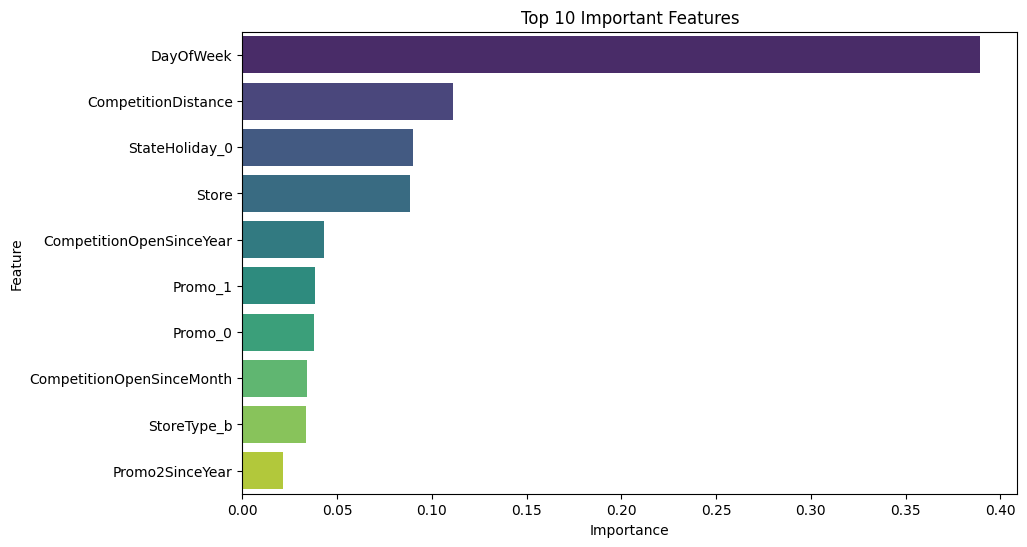

In [35]:
# Plot the top 10 important features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(x="importance", y="feature", data=top_features, palette="viridis")
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

- The feature importance plot reveals that **DayOfWeek** is the most influential factor in the model, significantly impacting the predictions compared to other features. 
- **CompetitionDistance** and **StateHoliday_0** also play critical roles, indicating that both proximity to competitors and specific holidays strongly affect outcomes.
-  Other variables like **Store**, **Promo_1**, and **CompetitionOpenSinceYear** contribute to a lesser but still notable extent, suggesting a multifaceted influence of store characteristics and promotional strategies.

### Confidence Interval 

In [36]:
# Confidence Interval
y_pred = trained_model.predict(X_val)
lower_ci, upper_ci = calculate_confidence_interval(y_pred)
print(f"95% Confidence Interval: ({lower_ci}, {upper_ci})")

95% Confidence Interval: ([5752.74256525], [5790.61102471])


### Serialize models

In [37]:
# Serialize the model
model_path='../model'
model_filename = serialize_model(trained_model, model_path)
print(f"The ML Model serialized and saved as: {model_filename}")

The ML Model serialized and saved as: model_06-01-2025-09-11-25-915874.pkl
